In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns


In [0]:
df_loan = pd.read_csv("/content/dataset_loan.csv")

In [318]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Loan_ID,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Loan_ID,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Loan_ID,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Loan_ID,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Loan_ID,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [192]:
df_loan.shape



(614, 13)

In [149]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Problem 1:Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe.**

In [150]:
# To identify unique column.
for i in df_loan:
  print(i)
  print(df_loan[i].is_unique)

Loan_ID
False
Gender
False
Married
False
Dependents
False
Education
False
Self_Employed
False
ApplicantIncome
False
CoapplicantIncome
False
LoanAmount
False
Loan_Amount_Term
False
Credit_History
False
Property_Area
False
Loan_Status
False


 so ,here we come to know that only "Loan_id " is unique attribute.

In [12]:
unique=[]
unique.append(df_loan.Loan_ID)
unique

[0       Loan_ID
 1       Loan_ID
 2       Loan_ID
 3       Loan_ID
 4       Loan_ID
          ...   
 609    LP002978
 610    LP002979
 611    LP002983
 612    LP002984
 613    LP002990
 Name: Loan_ID, Length: 614, dtype: object]

In [0]:
df_loan=df_loan.drop("Loan_ID",axis=1)

In [195]:
# To check whether the unique column is removed or not.
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Problem 2:Identifying Continous & Categorical Columns**


In [15]:
num_cols = df_loan._get_numeric_data().columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [16]:
#Continous columns
for i in num_cols:
  print(str(i)+'\t'+str(len(df_loan[i].unique())))

ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204
Loan_Amount_Term	11
Credit_History	3


In [17]:
# categorical columns
for j in list(set(df_loan.columns) - set(num_cols)):
  print(str(j)+'\t'+str(len(df_loan[j].unique())))

Dependents	5
Education	2
Loan_Status	2
Gender	3
Property_Area	3
Married	3
Self_Employed	3


In [0]:
df_loan['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [18]:
df_loan['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
df_loan['Education'].unique

<bound method Series.unique of 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object>

In [0]:
df_loan['Self_Employed'].unique

<bound method Series.unique of 0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object>

In [0]:
df_loan['Loan_Status'].unique

<bound method Series.unique of 0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object>

In [0]:
df_loan['Dependents'].unique

<bound method Series.unique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>

In [0]:
df_loan["Property_Area"].unique

<bound method Series.unique of 0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object>

**problem 3 :Performing Uni-variate Analysis with Plots.Record your Observations.**

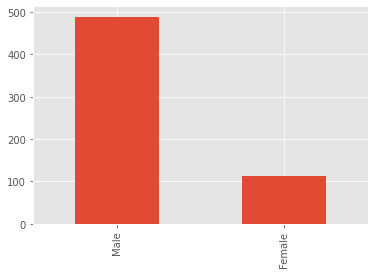

In [151]:
#Univarient analysis of categorical variable.
df_loan['Gender'].value_counts().plot.bar()

There are more chances of male to getting loan. 

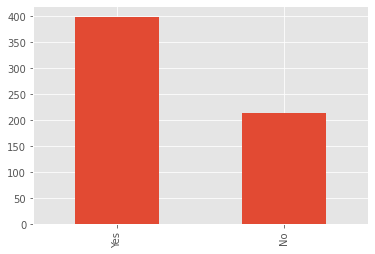

In [152]:
df_loan['Married'].value_counts().plot.bar()


More chances of getting loan to those who are married.

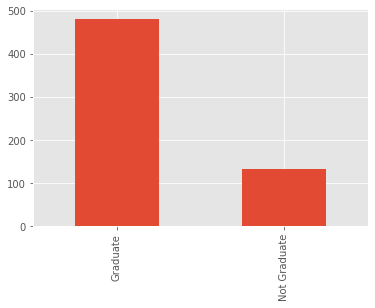

In [160]:
df_loan['Education'].value_counts().plot.bar()

There are maximum chances for approving loan whose education type is Graduate.

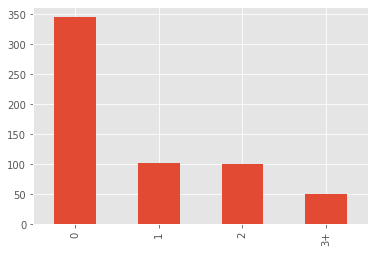

In [159]:
df_loan['Dependents'].value_counts().plot.bar()

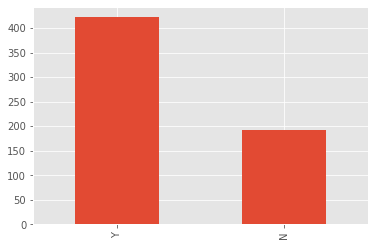

In [158]:
df_loan["Loan_Status"].value_counts().plot.bar()

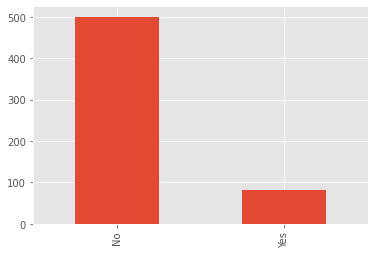

In [157]:
df_loan["Self_Employed"].value_counts().plot.bar()

There is  a less chances of getting loan who are self_employed.

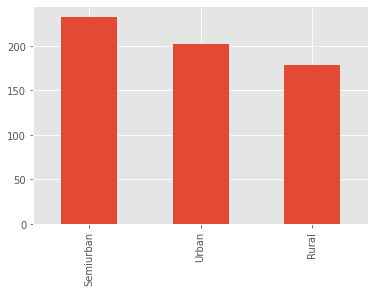

In [156]:
df_loan["Property_Area"].value_counts().plot.bar()

Property_Area semiurban has higher chances of loan as compared to urban and rural.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68f62d7630>,
      dtype=object)

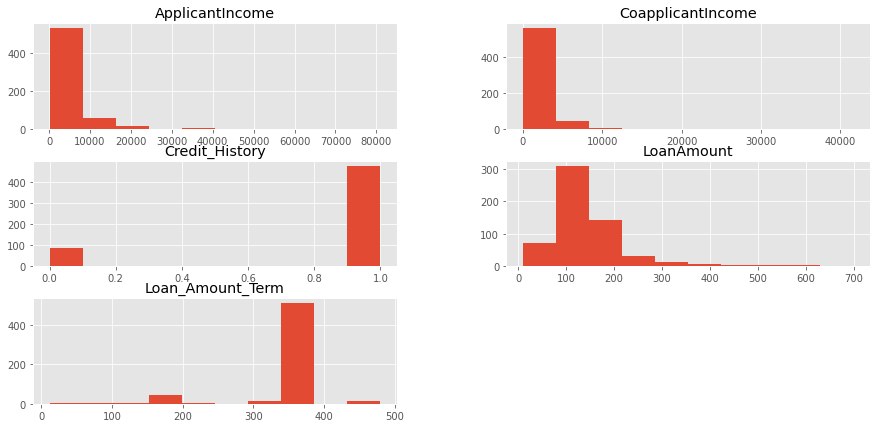

In [155]:
#Univarient analysis of continous variable
df_loan.hist(figsize=[15,7])

1.Most of the person has credit_History as 1

2.Most of the Applicant_Income lies between 0-10000

**problem 4:Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations**

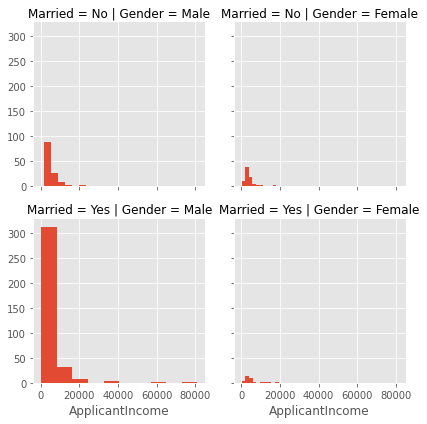

In [154]:
fn =sns.FacetGrid(df_loan,col='Gender',row="Married",height=3,aspect=1)
fn=fn.map(plt.hist,'ApplicantIncome')


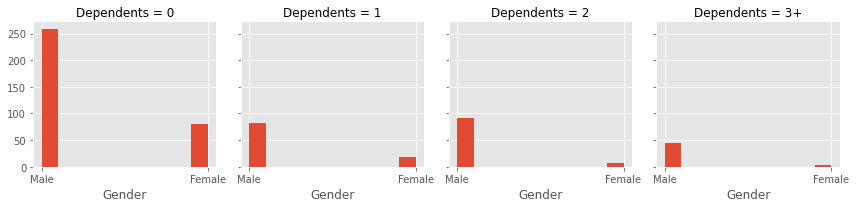

In [352]:
fn =sns.FacetGrid(df_loan,col='Dependents',height=3,aspect=1)
fn=fn.map(plt.hist,"Gender")

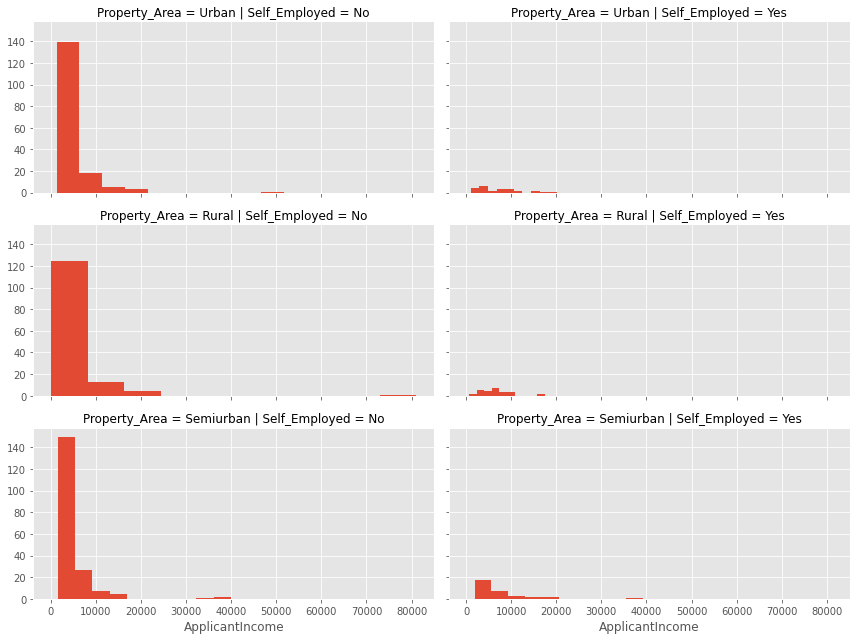

In [164]:
fn =sns.FacetGrid(df_loan,col='Self_Employed',row="Property_Area",height=3,aspect=2)
fn=fn.map(plt.hist,'ApplicantIncome')


Observations :

1.Married person whose gender is male has higher applicant Income compared to the gender female.

2.Dependency 0 has more male than female as compared to 1,2 ,3+.

3.Property area semiurban has higher applicantincome who are selfemployed.

**problem 5:Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc.**

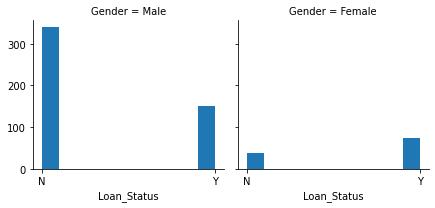

In [0]:
fn =sns.FacetGrid(df_loan,col='Gender',col_wrap=3,height=3)
fn=fn.map(plt.hist,'Loan_Status')

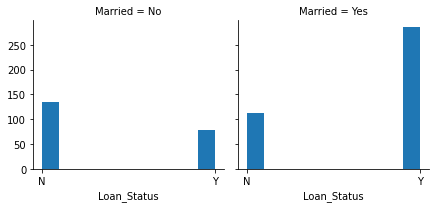

In [0]:
fn =sns.FacetGrid(df_loan,col='Married',col_wrap=3,height=3)
fn=fn.map(plt.hist,'Loan_Status')

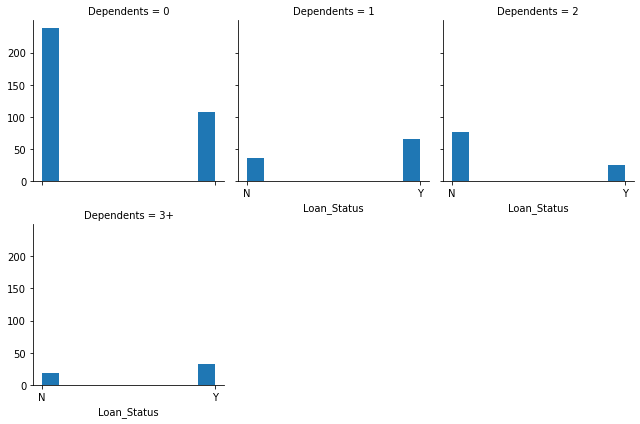

In [0]:
fn =sns.FacetGrid(df_loan,col='Dependents',col_wrap=3,height=3)
fn=fn.map(plt.hist,'Loan_Status')

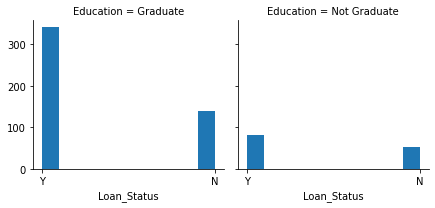

In [0]:
fn =sns.FacetGrid(df_loan,col='Education',col_wrap=3,height=3)
fn=fn.map(plt.hist,'Loan_Status')

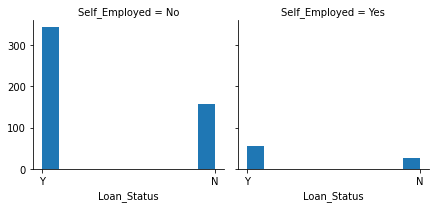

In [0]:
fn =sns.FacetGrid(df_loan,col='Self_Employed',col_wrap=3,height=3)
fn=fn.map(plt.hist,'Loan_Status')

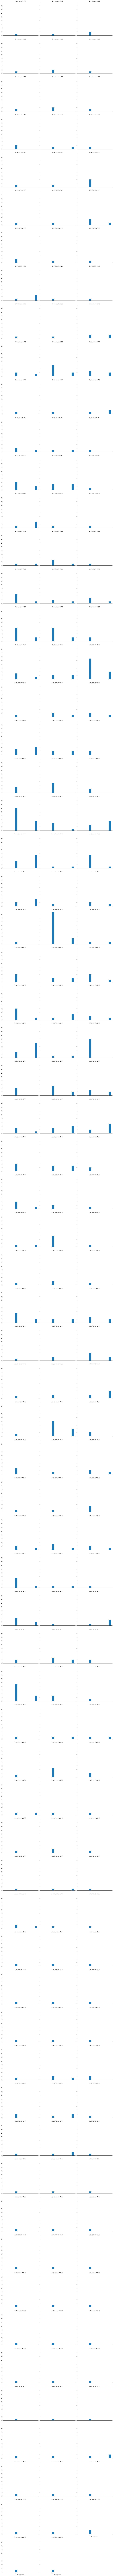

In [0]:
fn =sns.FacetGrid(df_loan,col="LoanAmount",col_wrap=3,height=5)
fn=fn.map(plt.hist,'Loan_Status')

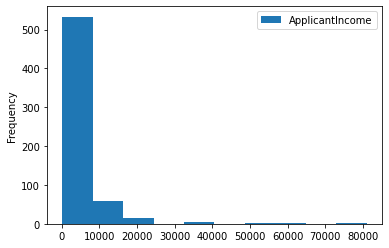

In [0]:
df_loan.plot.hist(x='Loan_Status', y="ApplicantIncome")

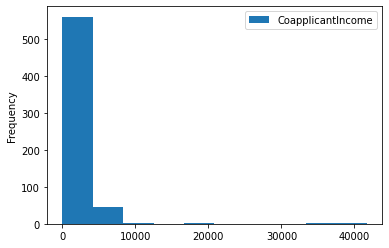

In [0]:
df_loan.plot.hist(x='Loan_Status', y="CoapplicantIncome")

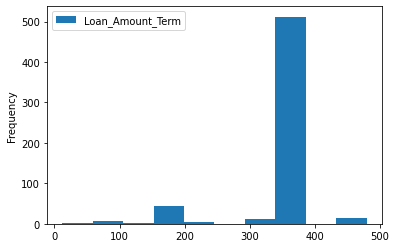

In [0]:
df_loan.plot.hist(x='Loan_Status', y="Loan_Amount_Term")

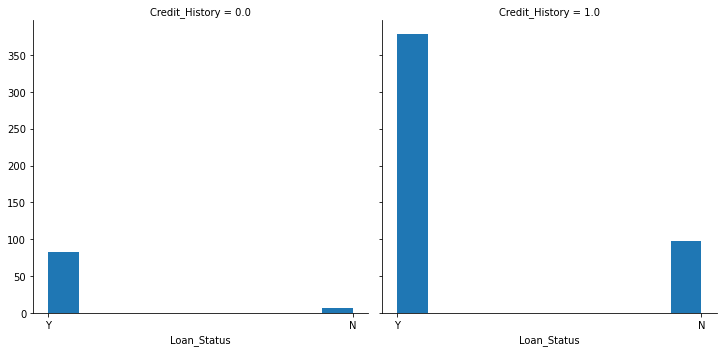

In [0]:
fn =sns.FacetGrid(df_loan,col='Credit_History',col_wrap=3,height=5)
fn=fn.map(plt.hist,'Loan_Status')

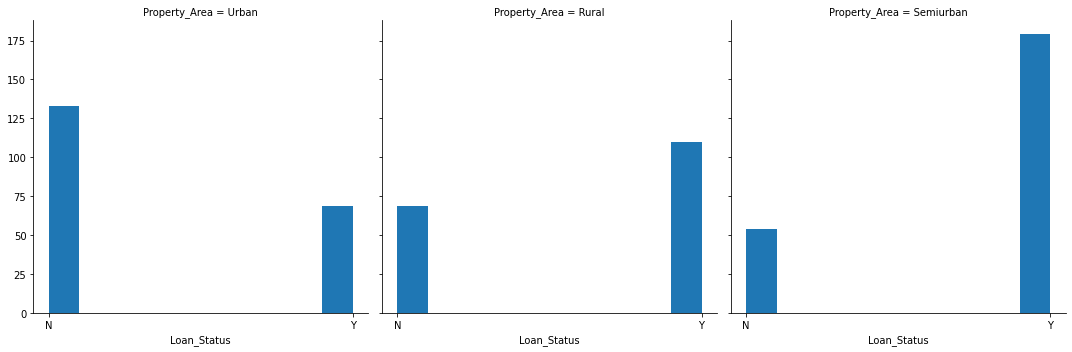

In [0]:
fn =sns.FacetGrid(df_loan,col='Property_Area',col_wrap=3,height=5)
fn=fn.map(plt.hist,'Loan_Status')

Observation :

1.Property_Area semiuran has more chances to be  granted loan

2.credit_history as 1 has higher chances of getting loan.

3.Majority of the person of the loans amount term lies between 300 -400.

4.Majority of people are not selfemployed.

5.Educatio type Graduate have higher chaces of approving loan.

**problem 6 :How is the class distribution (Y/N) in Label(Target) Variable ?** 

**problem 7:Identify the Independent Variables that have missing values.**

There are many  ways to identify the independent variables,which are :

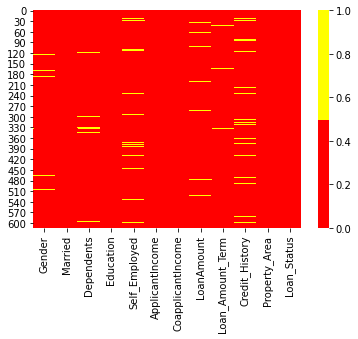

In [0]:
#Missing data heatmap
cols = df_loan.columns[:12] # first 12 columns
colours = ['#FF0000', '#ffff00'] # specify the colours - yellow is missing. Red is not missing.
sns.heatmap(df_loan[cols].isnull(), cmap=sns.color_palette(colours))


In [19]:
#Missing data percentage list
for col in df_loan.columns:
    pct_missing = np.mean(df_loan[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 4.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%


**problem 8:Handle missing values appropriately , explain the technique applied for each case**.

In [20]:
df_loan.isna().any()
df_loan.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:

#There are many of methods of handling missing values
#some of the are
#Drop the observation 
#Drop rows with a lot of missing values

m_missing=df_loan[df_loan['Credit_History']>40].index
df_less_missing_rows=df_loan.drop(m_missing,axis=0)
print(df_loan.shape)
print(df_less_missing_rows.shape)




(614, 12)
(614, 12)


In [0]:
df_loan['LoanAmount']=df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median())
df_loan['Loan_Amount_Term']=df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].median())
df_loan['Credit_History']=df_loan['Credit_History'].fillna(df_loan['Credit_History'].median())
df_loan['Self_Employed']=df_loan['Self_Employed'].fillna(method='ffill')
df_loan['Dependents']=df_loan['Dependents'].fillna(method='ffill')
df_loan['Married']=df_loan['Married'].fillna(method='ffill')
df_loan['Gender']=df_loan['Gender'].fillna(method='ffill')

In [351]:
#replacing missing values
df_loan.fillna(0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status
0,Loan_ID,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,1
1,Loan_ID,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Loan_ID,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Loan_ID,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Loan_ID,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [105]:

#drop the feature 
# Self_Employed has a lot of missing.
col_to_drop=['Self_Employed']
df_less_self_employese=df_loan.drop(col_to_drop,axis=1)
print(df_loan.shape)
print(df_less_self_employese.shape)

(614, 12)
(614, 11)


**problem 9 :Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles).**

In [32]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
# quartile 0%-25%
q1=df_loan.quantile(0)
q3=df_loan.quantile(0.25)
IQR=q3-q1
print(IQR)

ApplicantIncome      2727.5
CoapplicantIncome       0.0
LoanAmount             91.0
Loan_Amount_Term      348.0
Credit_History          1.0
dtype: float64


In [89]:
#identifying outliers ,, If an outlier is present in ths records then it will give output as True.
print((df_loan < (q1 - 1.5 * IQR)) |(df_loan > (q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0              False              False  ...          False          False
1              False               True  ...          False          False
2              False              False  ...          False          False
3              False               True  ...          False          False
4              False              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611             True               True  ...          False          False
612             True              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


In [86]:
# quartile bins 25% -50%
q1=df_loan.quantile(0.25)
q3=df_loan.quantile(0.50)
IQR=q3-q1
print(IQR)

ApplicantIncome       935.0
CoapplicantIncome    1188.5
LoanAmount             28.0
Loan_Amount_Term        0.0
Credit_History          0.0
dtype: float64


In [87]:
#identifying outliers ,, If an outlier is present in ths records then it will give output as True.
print((df_loan < (q1 - 1.5 * IQR)) |(df_loan > (q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0               True              False  ...          False          False
1              False              False  ...          False          False
2              False              False  ...          False          False
3              False              False  ...          False          False
4               True              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611             True              False  ...          False          False
612             True              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


In [81]:
#quartile bins 50% -75%
q1=df_loan.quantile(0.50)
q3=df_loan.quantile(0.75)
IQR=q3-q1
print(IQR)

ApplicantIncome      1982.50
CoapplicantIncome    1108.75
LoanAmount             40.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [82]:
#identifying outliers ,, If an outlier is present in ths records then it will give output as True.
print((df_loan < (q1 - 1.5 * IQR)) |(df_loan > (q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0              False              False  ...          False          False
1              False              False  ...          False          False
2              False              False  ...          False          False
3              False              False  ...          False          False
4              False              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611            False              False  ...          False          False
612            False              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


In [91]:
# quartile bins 75%-100% 
q1=df_loan.quantile(0.75)
q3=df_loan.quantile(1)
IQR=q3-q1
print(IQR)

ApplicantIncome      75205.00
CoapplicantIncome    39369.75
LoanAmount             532.00
Loan_Amount_Term       120.00
Credit_History           0.00
dtype: float64


In [92]:

#identifying outliers ,, If an outlier is present in ths records then it will give output as True.
print((df_loan < (q1 - 1.5 * IQR)) |(df_loan > (q3 + 1.5 * IQR)))


     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0              False              False  ...          False          False
1              False              False  ...          False          False
2              False              False  ...          False          False
3              False              False  ...          False          False
4              False              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611            False              False  ...          False          False
612            False              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


**problem 10: Use Box-Plot chart to represent the Outliers for each Independent Variable.** 

In [103]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


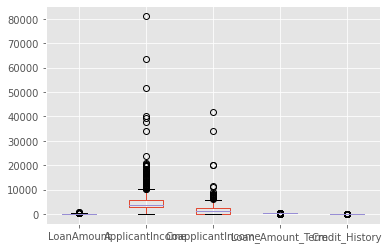

In [101]:
# box plot to represent each outliers in independent variable.
df_loan.boxplot(column=['LoanAmount',"ApplicantIncome","CoapplicantIncome","Loan_Amount_Term","Credit_History"])

**problem 11 :Perform treatment of these Outliers using appropriate techniqies.Explain your approach**

**Step 1 :Perform Label Encoding on Target Variable (Loan_Status).**

In [0]:
df = df_loan.copy()

In [0]:
le = LabelEncoder()
df_loan['enc_Loan_Status'] = le.fit_transform(df_loan['Loan_Status'])

In [368]:
df_loan.groupby(['Loan_Status','enc_Loan_Status']).size().reset_index().rename(columns={0:'count'})
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status
0,Loan_ID,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,Loan_ID,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Loan_ID,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Loan_ID,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Loan_ID,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


#Step 2:

**1 : Perform Label Encoding on Categorical Independent Variables.**

In [0]:
df = df_loan.copy()

In [0]:

for j in list(set(df.columns) - set(num_cols)):
  df_loan['enc_'+str(j)] = le.fit_transform(df_loan[j])

In [372]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'enc_Loan_Status', 'enc_Dependents', 'enc_Education', 'enc_Gender',
       'enc_Loan_ID', 'enc_Property_Area', 'enc_Married',
       'enc_enc_Loan_Status', 'enc_Self_Employed'],
      dtype='object')

In [373]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status,enc_Dependents,enc_Education,enc_Gender,enc_Loan_ID,enc_Property_Area,enc_Married,enc_enc_Loan_Status,enc_Self_Employed
0,Loan_ID,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,1,608,2,0,1,0
1,Loan_ID,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,608,0,1,0,0
2,Loan_ID,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1,608,2,1,1,1
3,Loan_ID,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,1,1,608,2,1,1,0
4,Loan_ID,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,608,2,0,1,0


**2.What is the shape of dataframe post Categorical Encoding ?**

In [374]:
df_loan.shape

(614, 22)

**3.Carry out Correlation analysis on this dataframe. Plot using HeatMap**.

In [375]:
corr = df_loan.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status,enc_Dependents,enc_Education,enc_Gender,enc_Loan_ID,enc_Property_Area,enc_Married,enc_enc_Loan_Status,enc_Self_Employed
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710,0.115036,-0.140760,0.046230,0.012335,-0.009500,0.049052,-0.004710,0.122728
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187,0.026683,-0.062290,0.086991,0.035989,0.010522,0.077760,-0.059187,-0.021807
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214,0.158914,-0.168759,0.097577,0.035199,-0.046632,0.147108,-0.033214,0.111754
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549,-0.087210,-0.073928,-0.075813,-0.023822,-0.076120,-0.095364,-0.022549,-0.027941
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556,-0.065459,-0.073658,0.005658,-0.016726,0.001963,0.009519,0.540556,0.006209


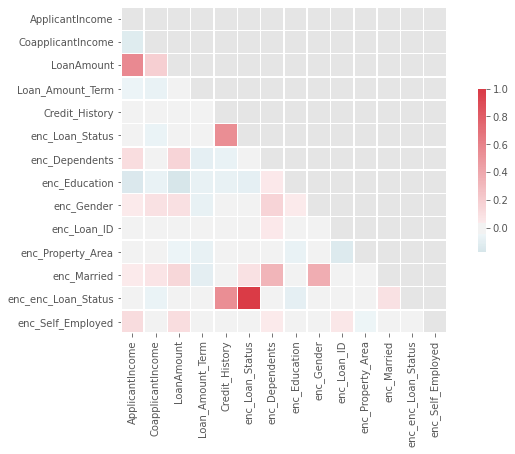

In [376]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask.
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**4.Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5).**

"Loan_status" and" Loan_amount_term" have strong correlation.

step 3:


**1.Perform One Hot Encoding on Categorical Independent Variables.**

In [377]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_loan_ohe = df_loan.copy()
df_loan_ohe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status,enc_Dependents,enc_Education,enc_Gender,enc_Loan_ID,enc_Property_Area,enc_Married,enc_enc_Loan_Status,enc_Self_Employed
0,Loan_ID,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,1,608,2,0,1,0
1,Loan_ID,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,608,0,1,0,0
2,Loan_ID,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1,608,2,1,1,1
3,Loan_ID,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,1,1,608,2,1,1,0
4,Loan_ID,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,608,2,0,1,0


**2.What is the shape of dataframe post OHE Encoding ?**

In [378]:
df_loan_ohe.shape

(614, 22)

3**.Carry out Correlation analysis on this dataframe. Plot using HeatMap**

In [379]:
oheCorr= df_loan_ohe.corr()
oheCorr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status,enc_Dependents,enc_Education,enc_Gender,enc_Loan_ID,enc_Property_Area,enc_Married,enc_enc_Loan_Status,enc_Self_Employed
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710,0.115036,-0.140760,0.046230,0.012335,-0.009500,0.049052,-0.004710,0.122728
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187,0.026683,-0.062290,0.086991,0.035989,0.010522,0.077760,-0.059187,-0.021807
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214,0.158914,-0.168759,0.097577,0.035199,-0.046632,0.147108,-0.033214,0.111754
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549,-0.087210,-0.073928,-0.075813,-0.023822,-0.076120,-0.095364,-0.022549,-0.027941
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556,-0.065459,-0.073658,0.005658,-0.016726,0.001963,0.009519,0.540556,0.006209
enc_Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000,-0.003361,-0.085884,0.012213,0.022369,0.032112,0.089072,1.000000,0.009035
enc_Dependents,0.115036,0.026683,0.158914,-0.087210,-0.065459,-0.003361,1.000000,0.054909,0.164475,0.052826,0.005131,0.333841,-0.003361,0.044505
enc_Education,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.085884,0.054909,1.000000,0.049480,0.035230,-0.065243,0.014097,-0.085884,-0.008734
enc_Gender,0.046230,0.086991,0.097577,-0.075813,0.005658,0.012213,0.164475,0.049480,1.000000,-0.014130,-0.019854,0.371532,0.012213,0.011676
enc_Loan_ID,0.012335,0.035989,0.035199,-0.023822,-0.016726,0.022369,0.052826,0.035230,-0.014130,1.000000,-0.128522,-0.017422,0.022369,0.055457


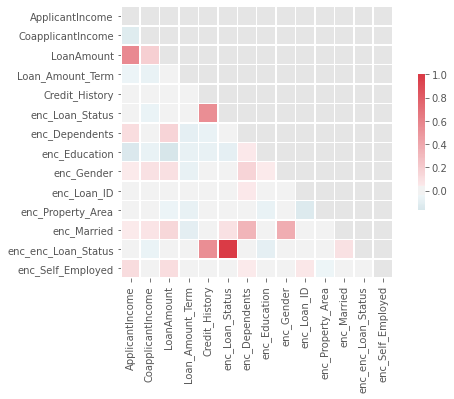

In [380]:
mask = np.zeros_like(oheCorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(oheCorr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**4.Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)**

1.LoanAmount and Applicationincome are strongly correlated.

2.enc_loan_Status and credit_History